In [1]:
import matplotlib.pyplot as plt
import numpy as np
import csv

In [2]:
models = ["ACCESS-ESM1-5","IPSL-CM6A-LR","CESM2","CanESM5","BCC-CSM2-MR", "GFDL-ESM4","MIROC-ES2L", "MPI-ESM1-2-HR", "NorESM2-LM","UKESM1-0-LL"]

In [3]:
# Open the CSV file to extract all the model weights
with open('/Users/6i0/Documents/Data/Weights.csv', newline='') as csvfile:
    # Create a CSV reader object
    reader = csv.DictReader(csvfile)
    
    # Initialize empty lists to store the weights
    weights = []
    weights_BMA100 = []
    weights_BMA1000 = []
    weights_sanderson_10 = []
    weights_sanderson_25 = []

    # Iterate over each row in the CSV file
    for row in reader:
        # Extract the weight from the desired column
        weight = row['Ensemble Mean']  # Change 'Ensemble Mean' to the desired column header
        # Check if the value is not empty before appending
        if weight:
            weights.append(weight)
        
        weight_BMA100 = row['BMA 100 sample']
        if weight_BMA100:
            weights_BMA100.append(weight_BMA100)
        
        weight_BMA1000 = row['BMA 1000 sample']
        if weight_BMA1000:
            weights_BMA1000.append(weight_BMA1000)
        
        weight_sanderson_10 = row['Sanderson 0.1']
        if weight_sanderson_10:
            weights_sanderson_10.append(weight_sanderson_10)
        
        weight_sanderson_25 = row['Sanderson 0.25']
        if weight_sanderson_25:
            weights_sanderson_25.append(weight_sanderson_25)

# Convert the strings to numerical values
weights = np.array(weights, dtype=float)
weights_BMA100 = np.array(weights_BMA100, dtype=float)
weights_BMA1000 = np.array(weights_BMA1000, dtype=float)
weights_sanderson_10 = np.array(weights_sanderson_10, dtype=float)
weights_sanderson_25 = np.array(weights_sanderson_25, dtype=float)

# Print the extracted weights
print(weights_BMA100)
# print(weights_BMA1000)
# print(weights_sanderson_10)
# print(weights_sanderson_25)

# Normalize weights
weights_norm_BMA100 = weights_BMA100 / np.sum(weights_BMA100)
weights_norm_BMA1000 = weights_BMA1000 / np.sum(weights_BMA1000)

# Normalize weights
weights_norm_sanderson_10 = weights_sanderson_10 / np.sum(weights_sanderson_10)
weights_norm_sanderson_25 = weights_sanderson_25 / np.sum(weights_sanderson_25)


[4.76e-03 7.95e-02 1.97e-02 2.77e-02 8.77e-02 2.77e-01 2.56e-01 1.81e-01
 6.60e-02 1.51e-06]


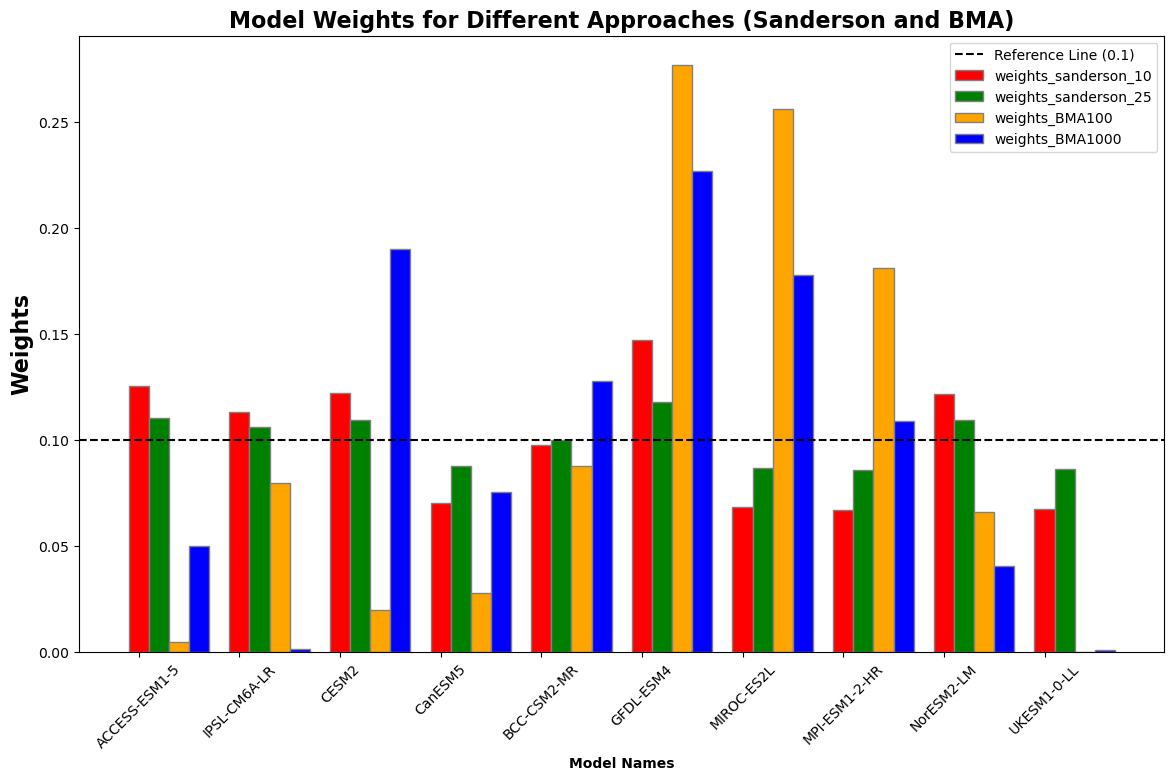

In [4]:
# Now let's plot all the weights on the same graph for comparison

plt.figure(figsize=(14, 8))

# Width of a bar 
width = 0.2

# Set position of bar on X axis
r1 = np.arange(len(models))
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]
r4 = [x + width for x in r3]
r5 = [x + width for x in r4]

# Make the plot
plt.bar(r2, weights_sanderson_10, color='red', width=width, edgecolor='grey', label='weights_sanderson_10')
plt.bar(r3, weights_sanderson_25, color='green', width=width, edgecolor='grey', label='weights_sanderson_25')
plt.bar(r4, weights_BMA100, color='orange', width=width, edgecolor='grey', label='weights_BMA100')
plt.bar(r5, weights_BMA1000, color='blue', width=width, edgecolor='grey', label='weights_BMA1000')

# Add xticks on the middle of the group bars
plt.xlabel('Model Names', fontweight='bold')
plt.xticks([r + width for r in range(len(r1))], models, rotation=45)
plt.ylabel('Weights', fontweight='bold',fontsize=16)
plt.title('Model Weights for Different Approaches (Sanderson and BMA)', fontsize=16, fontweight='bold')

# Add a dashed line at y=0.1
plt.axhline(y=0.1, color='black', linestyle='--', label='Reference Line (0.1)')

# Create legend & Show graphic
plt.legend()
plt.show()